In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from scipy import sparse
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score
import joblib

In [9]:
data = pd.read_csv('theDataset/Shakira.csv')

data = data.drop(['COMMENT_ID', 'AUTHOR', 'DATE'], axis=1)
# CONTENT / CLASS

x= data['CONTENT']
y=data['CLASS']
print(x)


0                                             Nice song﻿
1                                          I love song ﻿
2                                          I love song ﻿
3      860,000,000 lets make it first female to reach...
4                          shakira is best for worldcup﻿
                             ...                        
371                https://www.youtube.com/dsflmdsflmdsf
372                      https://www.youtube.com/sdlfksd
373                                     visite this link
374                                      visit this link
375                                     visite this link
Name: CONTENT, Length: 376, dtype: object


In [10]:
# convert sting to numbers 
vectorizer = CountVectorizer( )
featuers = vectorizer.fit_transform(x)
 

In [11]:
modle = KNeighborsClassifier(n_neighbors=3)
X_train, X_test,y_train, y_test = train_test_split(featuers,y ,
                                   test_size=0.25, 
                                   shuffle=True)



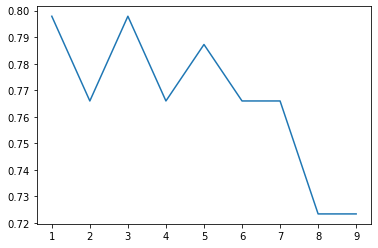

In [12]:
a = []
b =  range(1,10)
for i in b:
    modle = KNeighborsClassifier(n_neighbors=i)
    modle.fit(X_train, y_train) 
    y_predict = modle.predict(X_test)
    
    a.append(accuracy_score(y_predict, y_test)) 
plt.plot(b, a)

In [22]:
iter =10000
maxacurssy = 0.89
bestX_train, bestX_test,besty_train,besty_test = X_train, X_test,y_train, y_test 
for i in range(iter):
    X_train, X_test,y_train, y_test = train_test_split(featuers,y ,
                                   test_size=0.25, 
                                   shuffle=True)
    modle.fit(X_train, y_train) 
    
    if maxacurssy <modle.score(X_test,y_test):
        joblib.dump(modle,'nahini.joblib')
        maxacurssy = modle.score(X_test,y_test)
        print(maxacurssy)
        bestX_train, bestX_test,besty_train,besty_test = X_train, X_test,y_train, y_test

0.9148936170212766
0.925531914893617
0.9361702127659575
0.9468085106382979
0.9574468085106383


In [20]:
X_train, X_test,y_train, y_test = bestX_train, bestX_test,besty_train,besty_test
modle = KNeighborsClassifier(n_neighbors=3)
modle.fit(X_train, y_train) 
y_predict = modle.predict(X_test)

print(accuracy_score(y_predict, y_test))

0.925531914893617


In [19]:
def predictWithKnn(self, x, model, vectorizer):
    
    featuerspre = vectorizer.transform([str(x)])
    y_pred = modle.predict(x)
    return y_pred